In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [3]:
import glob
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir ="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dir="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
70295 Train images
17572 Test images


In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
img_width,img_height =224,224
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu',name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(3, 3),name="max_pooling2d_1"))
model.add(Conv2D(32, (3, 3),activation='relu',name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_2"))
model.add(Conv2D(64, (3, 3),activation='relu',name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_3"))   
model.add(Flatten(name="flatten_1"))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0

In [7]:
from keras.callbacks import ReduceLROnPlateau
validation_generator = train_datagen.flow_from_directory(
                       test_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)

Found 17572 images belonging to 38 classes.


In [8]:
model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
history_1 = model.fit(train_generator,                                    
                                  steps_per_epoch=None, 
                                  epochs=10,validation_data=validation_generator,validation_steps=None
                                  ,verbose=1,callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],use_multiprocessing=False,
               shuffle=True)

Epoch 1/10
2197/2197 [==============================] - 1684s 765ms/step - loss: 1.9742 - accuracy: 0.4338 - val_loss: 0.5284 - val_accuracy: 0.8326
Epoch 2/10
2197/2197 [==============================] - 1242s 565ms/step - loss: 0.5697 - accuracy: 0.8172 - val_loss: 0.3602 - val_accuracy: 0.8850
Epoch 3/10
2197/2197 [==============================] - 1216s 553ms/step - loss: 0.3875 - accuracy: 0.8752 - val_loss: 0.2490 - val_accuracy: 0.9160
Epoch 4/10
2197/2197 [==============================] - 1236s 562ms/step - loss: 0.3017 - accuracy: 0.9021 - val_loss: 0.3530 - val_accuracy: 0.8860
Epoch 5/10
2197/2197 [==============================] - 1226s 558ms/step - loss: 0.2692 - accuracy: 0.9120 - val_loss: 0.2274 - val_accuracy: 0.9266
Epoch 6/10
2197/2197 [==============================] - 1236s 563ms/step - loss: 0.2254 - accuracy: 0.9263 - val_loss: 0.1659 - val_accuracy: 0.9448
Epoch 7/10
2197/2197 [==============================] - 1216s 553ms/step - loss: 0.2117 - accuracy: 0.9305

In [10]:
from keras.models import load_model
model.save('plantdiseasenaivecnn8epoch.h5')

[[2.42560358e-17 1.78481682e-28 1.79808620e-15 1.64172317e-22
  3.75527193e-17 1.63208900e-14 2.13933154e-31 7.61248065e-29
  8.63561032e-31 5.03162664e-26 2.42466043e-24 1.13205894e-23
  4.27555314e-25 1.15067586e-16 9.51473851e-29 4.52674530e-12
  1.35303883e-14 1.11694138e-25 2.16042353e-13 1.11644438e-15
  2.76494485e-23 2.98637699e-18 1.70627747e-20 5.10048096e-19
  8.64021014e-19 5.12915190e-16 4.42988655e-27 9.79883818e-16
  6.81692356e-08 2.74806382e-07 6.67629040e-16 5.47653201e-10
  1.75208654e-12 6.06051346e-17 1.64076238e-18 9.99999642e-01
  6.04156655e-12 4.67170381e-20]]


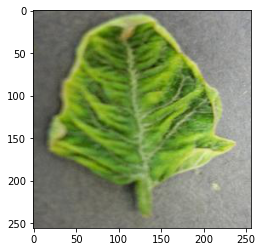

In [12]:
classes=list(train_generator.class_indices.keys())
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=224
img_height=224
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG')])

disease=image.load_img('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG')
plt.imshow(disease)
print(result)

In [13]:
import numpy as np
classresult=np.argmax(result,axis=1)
print(classes[classresult[0]])

Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [14]:
import tensorflow as tf
keras_model = tf.keras.models.load_model("plantdiseasenaivecnn8epoch.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
model = converter.convert()
file = open( 'outputnaivecnnof8epoch.tflite' , 'wb' ) 
file.write( model )

33963628

In [15]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="outputnaivecnnof8epoch.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print("")
print(output_details)

[{'name': 'conv2d_1_input', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

[{'name': 'Identity', 'index': 24, 'shape': array([ 1, 38], dtype=int32), 'shape_signature': array([-1, 38], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [16]:
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
input_data = [prepare('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG')]
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], input_data[0])

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[2.4255942e-17 1.7848033e-28 1.7980794e-15 1.6417108e-22 3.7552431e-17
  1.6320827e-14 2.1392989e-31 7.6123645e-29 8.6354787e-31 5.0315693e-26
  2.4246512e-24 1.1320547e-23 4.2755211e-25 1.1506715e-16 9.5145941e-29
  4.5267110e-12 1.3530337e-14 1.1169372e-25 2.1604154e-13 1.1164401e-15
  2.7649234e-23 2.9863542e-18 1.7062710e-20 5.1004810e-19 8.6402101e-19
  5.1291519e-16 4.4298696e-27 9.7988011e-16 6.8169101e-08 2.7480692e-07
  6.6762645e-16 5.4765326e-10 1.7520833e-12 6.0604910e-17 1.6407625e-18
  9.9999964e-01 6.0415783e-12 4.6717041e-20]]


In [17]:
classresult=np.argmax(output_data,axis=1)
print(classes[classresult[0]])

Tomato___Tomato_Yellow_Leaf_Curl_Virus


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


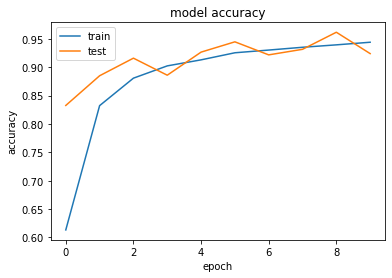

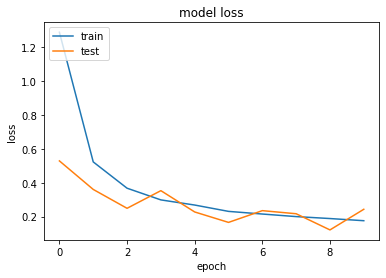

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

print(history_1.history.keys())

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()